In [115]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

if os.name == 'nt':
    plt.rcParams['font.family'] = 'Malgun Gothic'  # Windows 폰트 설정
elif os.name == 'posix':
    plt.rcParams['font.family'] = 'AppleGothic'  # Mac 폰트 설정

plt.rcParams['axes.unicode_minus'] = False
%matplotlib inline

In [116]:
titan = pd.read_csv('train.csv') 

print(titan.shape)
print(titan.info())

(891, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


# 문제 1

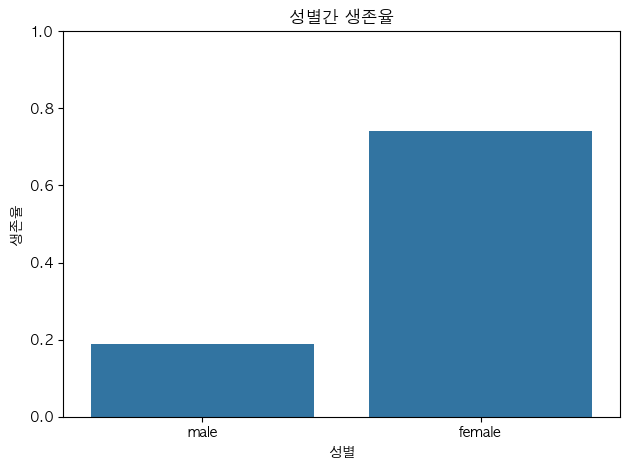

Sex
male      577
female    314
Name: count, dtype: int64


In [117]:
titan1 = titan

sns.barplot(data= titan1 , x = 'Sex', y= 'Survived', errorbar= None)

plt.title('성별간 생존율')
plt.xlabel('성별')
plt.ylabel('생존율')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

print(titan['Sex'].value_counts())

# 문제2

Pclass
3    491
1    216
2    184
Name: count, dtype: int64


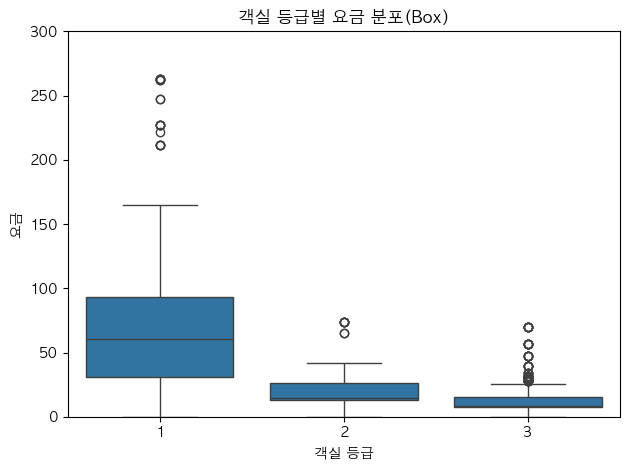

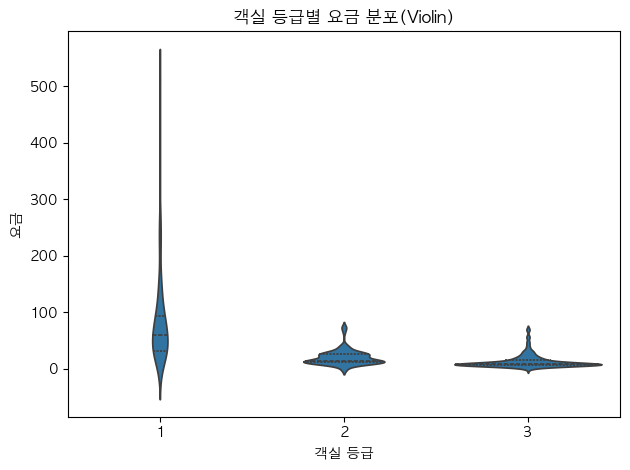

In [118]:
from matplotlib.pyplot import ylim


print(titan['Pclass'].value_counts())

sns.boxplot(data= titan, x= 'Pclass', y= 'Fare')
plt.ylim(0,300)
plt.title('객실 등급별 요금 분포(Box)')
plt.xlabel('객실 등급')
plt.ylabel('요금')
plt.tight_layout()
plt.show()

sns.violinplot(data= titan, x= 'Pclass', y= 'Fare', inner= 'quartile')
plt.title('객실 등급별 요금 분포(Violin)')
plt.xlabel('객실 등급')
plt.ylabel('요금')
plt.tight_layout()
plt.show()

# 문제3

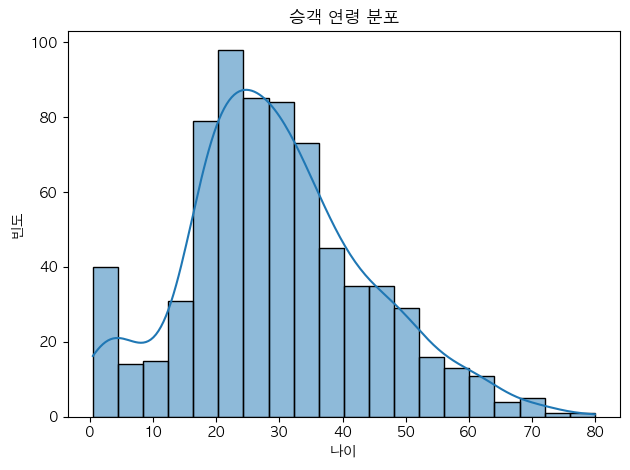

In [119]:
sns.histplot(data= titan, x= 'Age', bins = 20, kde= True)
plt.title('승객 연령 분포')
plt.xlabel('나이')
plt.ylabel('빈도')
plt.tight_layout()
plt.show()

# 문제4

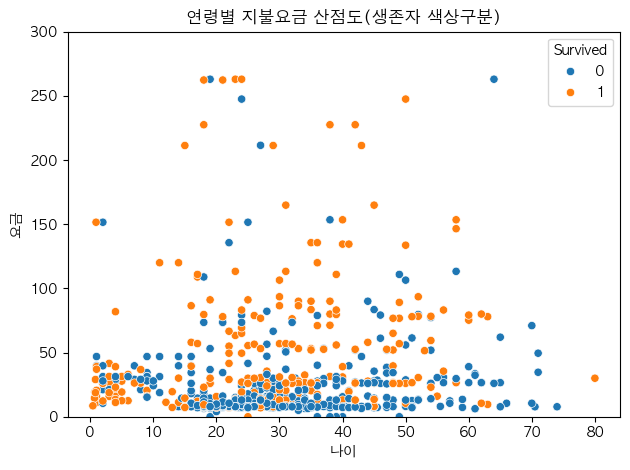

In [120]:
sns.scatterplot(data = titan , x= 'Age', y= 'Fare', hue='Survived')
plt.ylim(0,300)
plt.title('연령별 지불요금 산점도(생존자 색상구분)')
plt.xlabel('나이')
plt.ylabel('요금')
plt.tight_layout()
plt.show()

# 문제 5

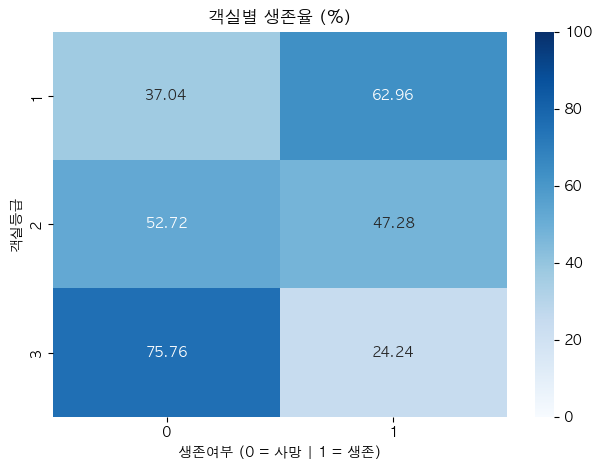

In [121]:
from pandas import crosstab


class_by_survived = pd.crosstab(titan['Pclass'], titan['Survived'], normalize='index')*100

sns.heatmap(data= class_by_survived, annot=True, fmt='.2f', vmin=0, vmax=100, cmap='Blues')
plt.title('객실별 생존율 (%)')
plt.xlabel('생존여부 (0 = 사망 | 1 = 생존)')
plt.ylabel('객실등급')
plt.tight_layout()
plt.show()

# 문제6

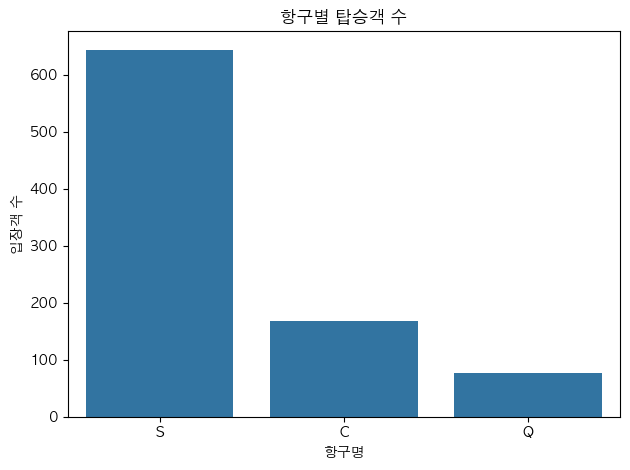

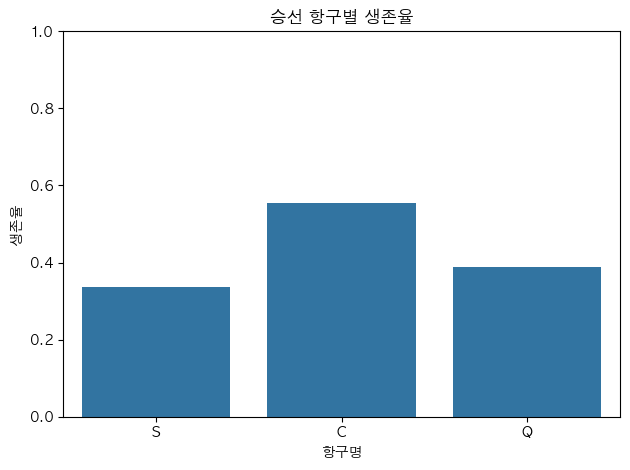

In [122]:
from pickle import TRUE


sns.countplot(titan,x= 'Embarked')
plt.title('항구별 탑승객 수')
plt.xlabel('항구명')
plt.ylabel('입장객 수')
plt.tight_layout()
plt.show()

sns.barplot(titan, x='Embarked', y= 'Survived', errorbar= None)
plt.title('승선 항구별 생존율')
plt.xlabel('항구명')
plt.ylabel('생존율')
plt.ylim(0,1)
plt.tight_layout()
plt.show()

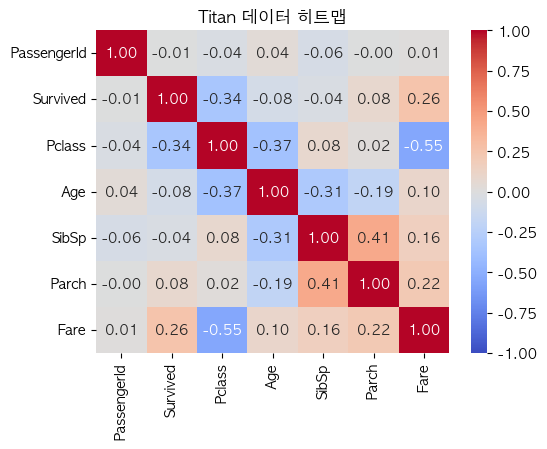

In [133]:
t = titan.select_dtypes(include= "number")

t_corr = t.corr()
plt.figure(figsize=(5.6,4.6))
sns.heatmap(t_corr, annot=True , fmt='.2f', vmin= -1 , vmax= 1, center=0, cmap= 'coolwarm' )
plt.title('Titan 데이터 히트맵')
plt.tight_layout()
plt.show()